 ## Domain – 911 Calls

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('911.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266543 entries, 0 to 266542
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        266543 non-null  float64
 1   lng        266543 non-null  float64
 2   desc       266543 non-null  object 
 3   zip        234049 non-null  float64
 4   title      266543 non-null  object 
 5   timeStamp  266543 non-null  object 
 6   twp        266448 non-null  object 
 7   addr       266543 non-null  object 
 8   e          266543 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 18.3+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Compute -- What are the top 10 Zipcodes for 911 &&   Question 1: Are Zipcodes 19446 and 19090 present ?

In [7]:
a=df["zip"].value_counts().head(10).index.tolist()

In [8]:
if (19446  in a and 19090  in a):
    print("YES")
elif(19446 in a and 19090 not  in a):
    print("19446 is only present ")
elif(19446 not in a and 19090  in a):
    print('19090 is only present')
else:
    print("Both values are not present")

YES


### Compute -- What are the top 4 townships (twp) for 911 calls & Question 2: Which of the following township are not present? -- LOWER POTTSGROVE, NORRISTOWN,HORSHAM, ABINGTON


In [9]:
l=df["twp"].value_counts().head(4).index.tolist()

In [10]:
print(l)

['LOWER MERION', 'ABINGTON', 'NORRISTOWN', 'UPPER MERION']


In [11]:
check=['LOWER POTTSGROVE', 'NORRISTOWN','HORSHAM', 'ABINGTON']

In [12]:
for i in check:
    if(i not in l):
        print(i)

LOWER POTTSGROVE
HORSHAM


### Compute -- Create new features & Question 3: What is the most common Reason for a 911 call based on Reason Column? Which comes second


In [13]:
df["Reason"] = df["title"].apply(lambda reason: reason.split(':')[0])

In [14]:
df["Reason"].value_counts().head(2)

EMS        133234
Traffic     93400
Name: Reason, dtype: int64

### Compute -- Plot barchart using matplot for 911 calls by Reason & Question 4: How can you plot the bars horizontally ?


In [15]:
df["Reason"].value_counts()

EMS        133234
Traffic     93400
Fire        39909
Name: Reason, dtype: int64

[133234, 93400, 39909]
['EMS', 'Traffic', 'Fire']


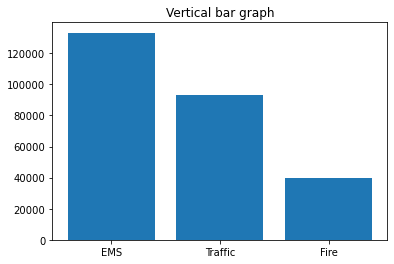

In [16]:
x=df["Reason"].value_counts().tolist()
y=df["Reason"].value_counts().index.tolist()

plt.bar(y, x)
print(x)
print(y)

plt.title("Vertical bar graph")
plt.show()

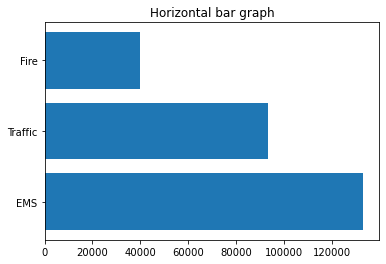

In [17]:
plt.barh(y, x)

plt.title("Horizontal bar graph")
plt.show()


### Do data manipulation & Question 5: Which day got maximum calls for EMS and how many?

In [22]:
from datetime import datetime

data1=df.loc[:,['title','timeStamp']]
data1['title1'],data1['title2']=df['title'].str.split(":",1).str
data1['date'],data1['time']=data1['timeStamp'].str.split(" ",1).str
data1['year'],data1['Month'],data1['day']=data1['date'].str.split("-",3).str
data1['date']=pd.to_datetime(data1['date'])
data1['Weekday']=data1['date'].dt.day_name()
data3=data1['Weekday'][data1['title1']=='EMS'].value_counts()
print(data3)

<ipython-input-22-1062534a5711>:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['title1'],data1['title2']=df['title'].str.split(":",1).str
<ipython-input-22-1062534a5711>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['date'],data1['time']=data1['timeStamp'].str.split(" ",1).str
<ipython-input-22-1062534a5711>:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['year'],data1['Month'],data1['day']=data1['date'].str.split("-",3).str


Friday       19938
Tuesday      19575
Wednesday    19422
Monday       19389
Thursday     19297
Saturday     18229
Sunday       17384
Name: Weekday, dtype: int64


### Compute -- Create a countplot of the Day of Week column with the hue based of the Reason column & Question 6: On which day traffic calls were lowest ?

In [24]:
from datetime import datetime
data1=df.loc[:,['title','timeStamp']]
data1['title1'],data1['title2']=df['title'].str.split(":",1).str
data1['date'],data1['time']=data1['timeStamp'].str.split(" ",1).str
data1['year'],data1['Month'],data1['day']=data1['date'].str.split("-",3).str
data1['date']=pd.to_datetime(data1['date'])
data1['Weekday']=data1['date'].dt.day_name()
data3=data1['Weekday'][data1['title1']=='Traffic'].value_counts()

<ipython-input-24-cd81d60cb800>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['title1'],data1['title2']=df['title'].str.split(":",1).str
<ipython-input-24-cd81d60cb800>:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['date'],data1['time']=data1['timeStamp'].str.split(" ",1).str
<ipython-input-24-cd81d60cb800>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['year'],data1['Month'],data1['day']=data1['date'].str.split("-",3).str


In [25]:
data3

Friday       14945
Tuesday      14867
Wednesday    14807
Thursday     14613
Monday       13797
Saturday     11524
Sunday        8847
Name: Weekday, dtype: int64

In [28]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
time = df['timeStamp'].iloc[0]

In [29]:
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [30]:

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["Day of Week"] = df["Day of Week"].map(dmap)

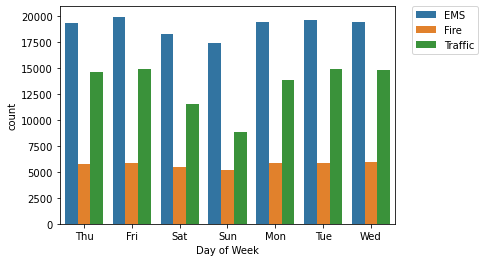

In [31]:
sns.countplot(x='Day of Week',data = df , hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

### Compute -- Create a countplot month wise -- Question 7: Which month saw highest calls for fire?

<ipython-input-33-f34d6d1cd089>:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['title1'],data1['title2']=data['title'].str.split(":",1).str
<ipython-input-33-f34d6d1cd089>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['date'],data1['time']=data1['timeStamp'].str.split(" ",1).str
<ipython-input-33-f34d6d1cd089>:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data1['year'],data1['Month'],data1['day']=data1['date'].str.split("-",3).str


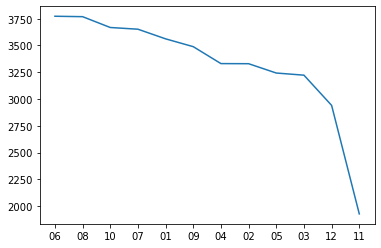

    Month
06   3773
08   3769
10   3668
07   3652
01   3562
09   3489
04   3331
02   3330
05   3243
03   3223
12   2941
11   1928


In [33]:
import pandas,numpy,matplotlib.pyplot as plt
from datetime import datetime
data=pandas.read_csv('911.csv')

data1=data.loc[:,['title','timeStamp']]
data1['title1'],data1['title2']=data['title'].str.split(":",1).str
data1['date'],data1['time']=data1['timeStamp'].str.split(" ",1).str
data1['year'],data1['Month'],data1['day']=data1['date'].str.split("-",3).str
data1['date']=pandas.to_datetime(data1['date'])
data1['Weekday']=data1['date'].dt.day_name()
data3=data1['Month'][data1['title1']=='Fire'].value_counts()
data4=pandas.DataFrame(data1['Month'][data1['title1']=='Fire'].value_counts())
plt.plot(data4)
plt.show()
print(data4)

### Compute -- Create Web Map for Traffic Calls & Question 8: Why some areas seem to have lower or almost zero traffic calls?

In [1]:
import folium

In [2]:
from datetime import datetime

In [11]:
lat=list(df['lat'])
long=list(df['lng'])

In [12]:
# lat,long

In [13]:
map=folium.Map(location=[40.2978759,-75.5812935],zoom_start=3)

In [14]:
# map

In [15]:
fg=folium.FeatureGroup(name="module8")
for lat,long in zip(lat,long):
    fg.add_child(folium.Marker(location=[lat,long], popup="hi",icon=folium.Icon(color="green")))

In [ ]:
map.add_child(fg)
# map.save('module8.html')